In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'axes.edgecolor':'0.1', 'grid.color':'0.9'})
import pandas as pd
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

# LLama Accuracy

In [93]:
data = {}

In [94]:
llama7b = pd.read_csv('ModelSweep-11-09-2024-2352.csv' ) #'ModelSweep-26-09-2024-1624.csv')
fr_labels = ['DSPy (vanilla)','MT-LLM']
models = ["llama2:7b","llama2:70b","llama3:7b","llama3:70b", "llama3.1:7b", "llama3.1:70b"]
llama70b = pd.read_csv('ModelSweep-16-09-2024-1329.csv')#'ModelSweep-08-10-2024-1052-70B.csv')
# llama70b = llama70b.drop(["Exception"], axis=1)
llama7b['Model'] = llama7b['Model'].replace('llama2', 'llama2:7b')
llama7b['Model'] = llama7b['Model'].replace('llama3', 'llama3:7b')
llama7b['Model'] = llama7b['Model'].replace('llama3.1', 'llama3.1:7b')
llama7b['Program'] = llama7b['Program'].replace('Jac', 'MT-LLM')
llama70b['Program'] = llama70b['Program'].replace('Jac', 'MT-LLM')


In [95]:
temp1 = llama7b[llama7b['Program'].str.match(r'^DSPy$')]
temp2 = llama70b[llama70b['Program'].str.match(r'^DSPy$')]
data['DSPy (vanilla)'] = pd.concat([temp1, temp2])

temp3 = llama7b[llama7b['Program'].str.match(r'^MT-LLM$')]
temp4 = llama70b[llama70b['Program'].str.match(r'^MT-LLM$')]
data['MT-LLM'] = pd.concat([temp3, temp4])

df = pd.concat([data[framework] for framework in fr_labels])
df = df[df["QuestionID"] <=2050]

In [96]:
# df = df[df['Failed'] == False]
df['Model'] = pd.Categorical(df['Model'], categories=models, ordered=True)

/tmp/ipykernel_3826653/1844925217.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
/tmp/ipykernel_3826653/1844925217.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()


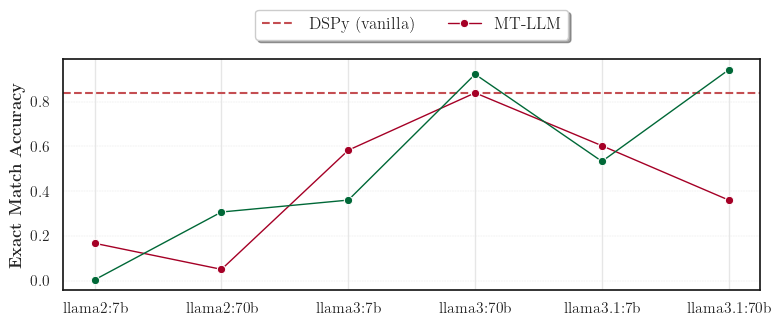

In [97]:
ddf = df
ddf['ExactMatch'] = ddf['ExactMatch'].astype(int)
dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
max_dspy_avg = dspy_avg.max()
max_dspy_avg
mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()

fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]
fr_colors = {'DSPy':colors[0], 'MT-LLM':colors[1]}
order = ['DSPy', 'MT-LLM']
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(order  =models, hue_order = order,x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
plt.axhline(y=max_dspy_avg, color='r', linestyle='--', label=f'Max DSPy Mean: {max_dspy_avg:.2f}')
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0.5, 1)
plt.show
plt.savefig('ExactMatchAcccuracy_all_at_120.png', dpi=300, bbox_inches='tight')


/tmp/ipykernel_3826653/242024530.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
/tmp/ipykernel_3826653/242024530.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()


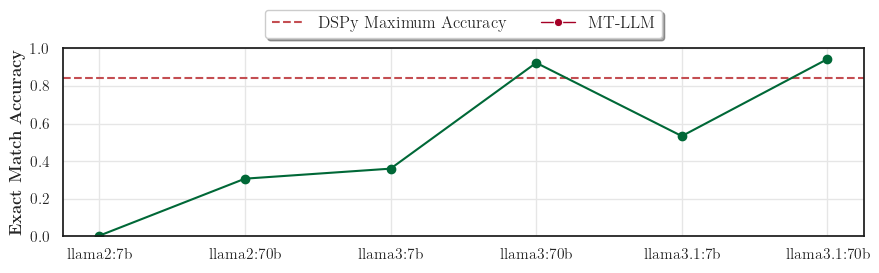

In [98]:
ddf = df
ddf['ExactMatch'] = ddf['ExactMatch'].astype(int)
dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
max_dspy_avg = dspy_avg.max()
max_dspy_avg
mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()

plt.figure(figsize=(9, 3))
# Horizontal line for the max average of DSPy
plt.axhline(y=max_dspy_avg, color='r', linestyle='--', label=f'Max DSPy Mean: {max_dspy_avg:.2f}')
# Scatter plot for MT-LLM mean ExactMatch values
plt.plot(mt_llm_avg.index, mt_llm_avg, marker='o', label='MT-LLM Mean ExactMatch', color=colors[1])

# Add labels and title
# plt.xlabel('Model')
plt.ylabel(r'\textbf{Exact Match Accuracy}')
# plt.title('Mean ExactMatch Accuracy Comparison for DSPy and MT-LLM')
labels = ['DSPy Maximum Accuracy', 'MT-LLM']
plt.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 1)

plt.savefig('ExactMatchAcccuracy_llama_vs_DSPy_max.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [99]:
# fig, ax = plt.subplots(figsize=(9, 1.2))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]
# fr_colors = {'DSPy':colors[0], 'Jac':colors[1]}
# order = ['DSPy','Jac']
# # ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(hue_order = order,x="Model", y="Time(s)",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
# # sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
# handles, labels = ax.get_legend_handles_labels()
# labels = fr_labels
# ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.70), ncol=4)
# ax.set_xlabel("")
# ax.set_ylabel(r"\textbf{Average Latency(s)}", fontsize=12)
# ax.set_yscale('log')
# plt.grid(axis='y',linestyle='--', linewidth=0.35)
# ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=100))
# # plt.ylim(0.5, 1)
# plt.show
# # plt.savefig('ExactMatchAcccuracy_all.png', dpi=300, bbox_inches='tight')

In [100]:
dfff = df[['Model', 'Program', 'ExactMatch', 'Failed', 'RawResponse']]

conditions = [
    (dfff['ExactMatch'] == True) & (dfff['Failed'] == False),
    (dfff['ExactMatch'] == False) & (dfff['Failed'] == False),
    (dfff['Failed'] == True) & (dfff['RawResponse'] != '[]'),
    (dfff['RawResponse'] == '[]')
]
choices = ['Accurate', 'Incorrect', 'Type-mismatch', 'Timeout']

dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')
agg_df = dfff.groupby(['Model', 'Program', 'ResponseCategory']).size().reset_index(name='Count')

desired_order = ['llama2:70b', 'llama3:70b', 'llama3.1:70b.DSPY']
agg_df_1 = agg_df[agg_df['Model'] == 'llama3.1:70b']
agg_df_2 = agg_df[agg_df['Model'] != 'llama3.1:70b']
agg_df = pd.concat([agg_df_2, agg_df_1], ignore_index=True)

/tmp/ipykernel_3826653/1069150499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')
/tmp/ipykernel_3826653/1069150499.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = dfff.groupby(['Model', 'Program', 'ResponseCategory']).size().reset_index(name='Count')


In [101]:
dspy_pivot = agg_df[agg_df['Program'] == 'DSPy']
jac_pivot = agg_df[agg_df['Program'] == 'MT-LLM']

/tmp/ipykernel_3826653/268447003.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dspy_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0).plot(
/tmp/ipykernel_3826653/268447003.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  jac_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0).plot(
/tmp/ipykernel_3826653/268447003.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = dspy_pivot.pivot_ta

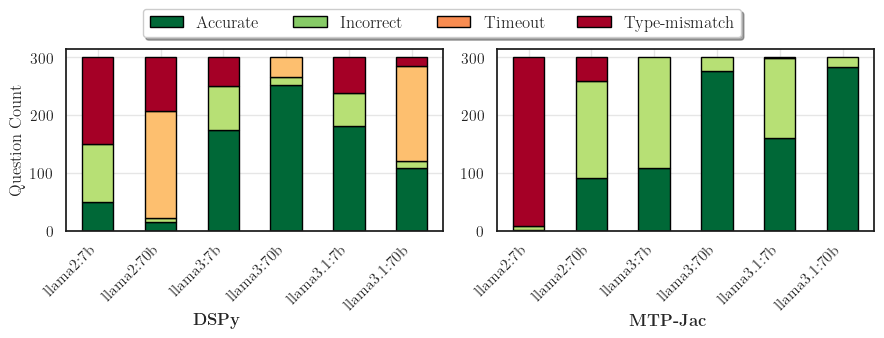

In [102]:
from matplotlib.patches import Patch


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

# Plotting DSPy
dspy_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0).plot(
    kind='bar', stacked=True, ax=ax1, colormap='RdYlGn_r', edgecolor='black', linewidth=1.0)
# ax1.set_title('DSPy Response Categories')
ax1.set_ylabel('Question Count')
ax1.set_xlabel('')
ax1.legend_.remove()
# ax1.legend(title='ResponseCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(models, rotation=45, ha='right')

# Plotting Jac
jac_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0).plot(
    kind='bar', stacked=True, ax=ax2, colormap='RdYlGn_r', edgecolor='black', linewidth=1.0)
# ax2.set_title('Jac Response Categories')
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.legend_.remove()
# ax2.legend(title='ResponseCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticklabels(models, rotation=45, ha='right')

fig.tight_layout()
fig.show()

df_pivot = dspy_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0)

colors = [plt.cm.RdYlGn_r(0.0), plt.cm.RdYlGn_r(0.25), plt.cm.RdYlGn_r(0.75) ,plt.cm.RdYlGn_r(1.0)]

legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Accurate'),
                   Patch(facecolor=colors[1], edgecolor='black', label='Incorrect'),
                   Patch(facecolor=colors[2], edgecolor='black', label='Timeout'),
                   Patch(facecolor=colors[3], edgecolor='black', label='Type-mismatch')]

fig.legend(handles=legend_elements, loc='upper center', shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.1), ncol=4)
fig.tight_layout()
fig.show()
fig.text(0.25, 0.02, r'\textbf{DSPy}', ha='center', fontsize=12)
fig.text(0.75, 0.02, r'\textbf{MTP-Jac}', ha='center', fontsize=12)


fig.savefig('ExactMatchAcccuracy_breakdown_llama.pdf', dpi=300, bbox_inches='tight')

In [103]:
# fig, axes = plt.subplots(2,1,figsize=(9, 4))

# colors_tok = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]

# for i,plot in enumerate(["PromptTokens","CompletionTokens"]):
#     # colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
#     sns.barplot(x="Model", y=plot, hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors_tok, ax=axes[i],edgecolor='black', linewidth=1)
#     axes[i].set_xlabel("")
#     # axes[i].set_ylabel("")
#     if plot == "PromptTokens":
#         axes[i].set_ylabel(r"\centering\textbf{Prompt Tokens}", fontsize=12)
#         axes[i].legend().set_visible(False)
#         axes[i].set_xticklabels([])
#     else:
#         axes[i].set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
#         axes[i].legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 2.6), ncol=4)
#     axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
#     # ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
#     # plt.ylim(0, 400)
#     plt.savefig('Token_usage.png', dpi=300, bbox_inches='tight')
# plt.show

# OpenAI Accuracy

In [104]:
data = {}

In [105]:
openai = pd.read_csv('ModelSweep-21-06-2024-0103.csv')
openai_comp = pd.read_csv('ModelSweep-25-06-2024-2249.csv')
openai['Program'] = openai['Program'].replace('Jac', 'MT-LLM')

data['DSPy (vanilla)'] = openai[openai['Program'].str.match(r'^DSPy$')]
data['MT-LLM'] = openai[openai['Program'].str.match(r'^MT-LLM$')]
data['DSPy (compiled)'] = openai_comp[openai_comp['Program'].str.match(r'^DSPy (compiled)$')]


fr_labels = ['DSPy (vanilla)','DSPy (compiled)', 'MT-LLM']
df = pd.concat([data[framework] for framework in fr_labels])
df = df[df["QuestionID"] <=2050]
models = df['Model'].unique()


In [106]:
df

,Unnamed: 0,QuestionID,Question,GivenAnswer,Model,Program,Output,ExactMatch,Failed,Time(s),PromptTokens,CompletionTokens,RawPrompt,RawResponse
0,0,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-3.5-turbo,DSPy,72,True,False,2.917058,114,73,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clokvliFEWp61rjxSsTWIolcVD5..."
3,3,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4,DSPy,72,True,False,2.516877,114,99,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clvwrzbdANXZQyUyxP782k1kclq..."
6,6,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4-turbo,DSPy,72,True,False,2.895496,269,210,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clwDOOlAjfnGtLx8JzNpCS4It8F..."
9,9,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4o,DSPy,72,True,False,2.627395,262,294,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9by5h5em9wZHXOMyFE6USde0eR5s..."
12,12,1,Weng earns $12 an hour for babysitting. Yester...,10,gpt-3.5-turbo,DSPy,10,True,False,2.795607,259,125,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clwfpXcsdwafgkbmN6TQtSVDbVw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,3587,298,There were sweets on the table. Jack came and ...,22,gpt-4o,MT-LLM,22,True,False,7.820949,185,179,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9crZZ72yBJMMtLMPGGXXNL37Lb8Q..."
3590,3590,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-3.5-turbo,MT-LLM,2,True,False,3.652010,200,107,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9crZpwOVpII7JApRkd1V2qPbdj9P..."
3593,3593,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4,MT-LLM,2,True,False,5.734989,200,95,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9cra28vHHw05PssG1cOrKoK5tZQW..."
3596,3596,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4-turbo,MT-LLM,2,True,False,5.684720,200,130,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9craUFG52X8vGcWM7wOhqNLvcoar..."


In [107]:
# temp1 = llama7b[llama7b['Program'].str.match(r'^DSPy$')]
# temp2 = llama70b[llama70b['Program'].str.match(r'^DSPy$')]
# data['DSPy (vanilla)'] = pd.concat([temp1, temp2])

# temp3 = llama7b[llama7b['Program'].str.match(r'^MT-LLM$')]
# temp4 = llama70b[llama70b['Program'].str.match(r'^MT-LLM$')]
# data['MT-LLM'] = pd.concat([temp3, temp4])

# df = pd.concat([data[framework] for framework in fr_labels])
# df = df[df["QuestionID"] <=2050]

In [108]:
# df = df[df['Failed'] == False]
# df['Model'] = pd.Categorical(df['Model'], categories=models, ordered=True)

<function matplotlib.pyplot.show(close=None, block=None)>

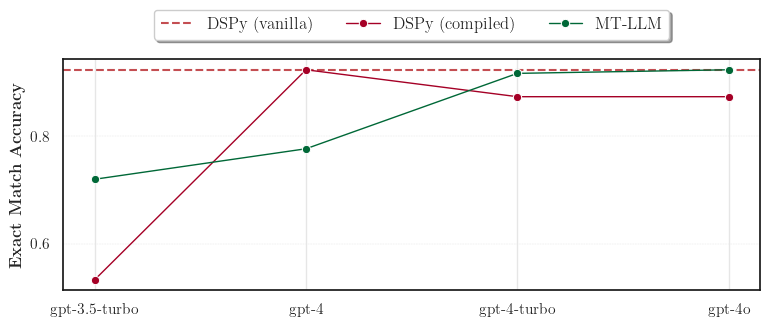

In [109]:
ddf = df
ddf['ExactMatch'] = ddf['ExactMatch'].astype(int)
dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
max_dspy_avg = dspy_avg.max()
max_dspy_avg
mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()

fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]
fr_colors = {'DSPy':colors[0], 'MT-LLM':colors[1]}
order = ['DSPy', 'MT-LLM']
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(order  =models, hue_order = order,x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
ax.axhline(y=max_dspy_avg, color='r', linestyle='--', label=f'Max DSPy Mean: {max_dspy_avg:.2f}')
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0.5, 1)
plt.show
# plt.savefig('ExactMatchAcccuracy_all_at_120.png', dpi=300, bbox_inches='tight')


In [110]:
# ddf = df
# ddf['ExactMatch'] = ddf['ExactMatch'].astype(int)
# dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
# max_dspy_avg = dspy_avg.max()
# max_dspy_avg
# mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()

# plt.figure(figsize=(9, 3))
# # Horizontal line for the max average of DSPy
# plt.axhline(y=max_dspy_avg, color='r', linestyle='--', label=f'Max DSPy Mean: {max_dspy_avg:.2f}')
# # Scatter plot for MT-LLM mean ExactMatch values
# plt.plot(mt_llm_avg.index, mt_llm_avg, marker='o', label='MT-LLM Mean ExactMatch', color=plt.cm.RdYlGn(1.0))

# # Add labels and title
# # plt.xlabel('Model')
# plt.ylabel(r'\textbf{Exact Match Accuracy}')
# # plt.title('Mean ExactMatch Accuracy Comparison for DSPy and MT-LLM')
# labels = ['DSPy Maximum Accuracy', 'MT-LLM']
# plt.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
# plt.grid(True)
# plt.tight_layout()
# plt.ylim(0.7, 1)

# plt.savefig('ExactMatchAcccuracy_openai_vs_DSPy_max.png', dpi=300, bbox_inches='tight')

# # Show plot
# plt.show()

In [111]:
# fig, ax = plt.subplots(figsize=(9, 1.2))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]
# fr_colors = {'DSPy':colors[0], 'Jac':colors[1]}
# order = ['DSPy','Jac']
# # ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(hue_order = order,x="Model", y="Time(s)",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
# # sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
# handles, labels = ax.get_legend_handles_labels()
# labels = fr_labels
# ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.70), ncol=4)
# ax.set_xlabel("")
# ax.set_ylabel(r"\textbf{Average Latency(s)}", fontsize=12)
# ax.set_yscale('log')
# plt.grid(axis='y',linestyle='--', linewidth=0.35)
# ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=100))
# # plt.ylim(0.5, 1)
# plt.show
# # plt.savefig('ExactMatchAcccuracy_all.png', dpi=300, bbox_inches='tight')

In [112]:
dfff = df[['Model', 'Program', 'ExactMatch', 'Failed', 'RawResponse']]

conditions = [
    (dfff['ExactMatch'] == True) & (dfff['Failed'] == False),
    (dfff['ExactMatch'] == False) & (dfff['Failed'] == False),
    (dfff['Failed'] == True) & (dfff['RawResponse'] != '[]'),
    (dfff['RawResponse'] == '[]')
]
choices = ['Accurate', 'Incorrect', 'Type-mismatch', 'Timeout']

dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')
agg_df = dfff.groupby(['Model', 'Program', 'ResponseCategory']).size().reset_index(name='Count')

desired_order = ['llama2:70b', 'llama3:70b', 'llama3.1:70b.DSPY']
agg_df_1 = agg_df[agg_df['Model'] == 'llama3.1:70b']
agg_df_2 = agg_df[agg_df['Model'] != 'llama3.1:70b']
agg_df = pd.concat([agg_df_2, agg_df_1], ignore_index=True)

/tmp/ipykernel_3826653/1069150499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff['ResponseCategory'] = np.select(conditions, choices, default='Unknown')


In [113]:
dspy_pivot = agg_df[agg_df['Program'] == 'DSPy']
jac_pivot = agg_df[agg_df['Program'] == 'MT-LLM']
dspy_pivot

,Model,Program,ResponseCategory,Count
0,gpt-3.5-turbo,DSPy,Accurate,160
1,gpt-3.5-turbo,DSPy,Incorrect,114
2,gpt-3.5-turbo,DSPy,Type-mismatch,26
5,gpt-4,DSPy,Accurate,277
6,gpt-4,DSPy,Incorrect,18
7,gpt-4,DSPy,Type-mismatch,5
10,gpt-4-turbo,DSPy,Accurate,262
11,gpt-4-turbo,DSPy,Incorrect,22
12,gpt-4-turbo,DSPy,Type-mismatch,16
15,gpt-4o,DSPy,Accurate,262


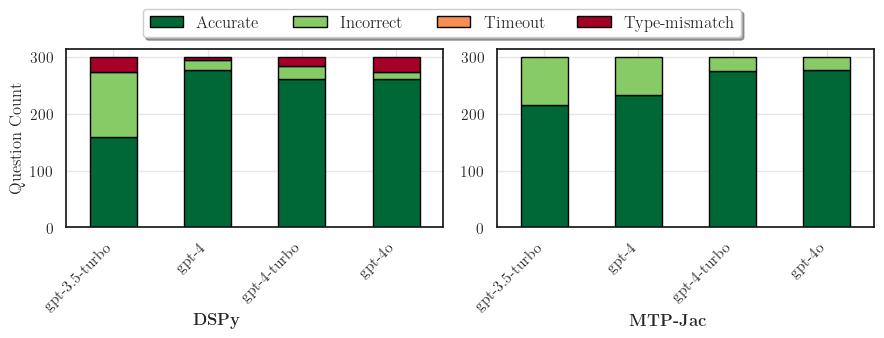

In [114]:
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

colors = [plt.cm.RdYlGn_r(0.0), plt.cm.RdYlGn_r(0.25), plt.cm.RdYlGn_r(0.75) ,plt.cm.RdYlGn_r(1.0)]
color_x = [plt.cm.RdYlGn_r(0.0), plt.cm.RdYlGn_r(0.25), plt.cm.RdYlGn_r(1.0) ,plt.cm.RdYlGn_r(0.75)]
hex_colors = [mcolors.to_hex(color) for color in color_x]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

# Plotting DSPy
dspy_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0).reindex(columns=choices).plot(
    kind='bar', stacked=True, ax=ax1, color=hex_colors, edgecolor='black', linewidth=1.0)
# ax1.set_title('DSPy Response Categories')
ax1.set_ylabel('Question Count')
ax1.set_xlabel('')
ax1.legend_.remove()
# ax1.legend(title='ResponseCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(models, rotation=45, ha='right')



# Plotting Jac
jac_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0).reindex(columns=choices).plot(
    kind='bar', stacked=True, ax=ax2, color=hex_colors, edgecolor='black', linewidth=1.0)
# ax2.set_title('Jac Response Categories')
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.legend_.remove()
# ax2.legend(title='ResponseCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticklabels(models, rotation=45, ha='right')

fig.tight_layout()
fig.show()

df_pivot = dspy_pivot.pivot_table(index=['Model', 'Program'], columns='ResponseCategory', values='Count').fillna(0)



# Plotting
# df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn_r', edgecolor='black', linewidth=1.0)

# Adding labels and title
# fig.ylabel('Count')
# fig.title('Response Categories Stacked Barplot for Each Framework')
# fig.xticks(rotation=45, ha='right')
# fig.legend(title='ResponseCategory', bbox_to_anchor=(1.05, 1), loc='upper left')
# fig.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
# Show plot
# Custom legend

colors = [plt.cm.RdYlGn_r(0.0), plt.cm.RdYlGn_r(0.25), plt.cm.RdYlGn_r(0.75) ,plt.cm.RdYlGn_r(1.0)]

legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Accurate'),
                   Patch(facecolor=colors[1], edgecolor='black', label='Incorrect'),
                   Patch(facecolor=colors[2], edgecolor='black', label='Timeout'),
                   Patch(facecolor=colors[3], edgecolor='black', label='Type-mismatch')]

fig.legend(handles=legend_elements, loc='upper center', shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.1), ncol=4)
fig.tight_layout()
fig.text(0.25, 0.02, r'\textbf{DSPy}', ha='center', fontsize=12)
fig.text(0.75, 0.02, r'\textbf{MTP-Jac}', ha='center', fontsize=12)
fig.show()

fig.savefig('ExactMatchAcccuracy_openai_breakdown_.pdf', dpi=300, bbox_inches='tight')